# Task 4.9 - Part 2

## Step 1. Import Data and Libraries.

In [1]:
# Import libraries
 
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path
path = r'/Users/Ayaz/Desktop/Instacart Basket Analysis'

In [3]:
# Import dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'IC_merged.pkl'))

## Step 2. Following Exercise 

### Creating Bar Charts

<Axes: >

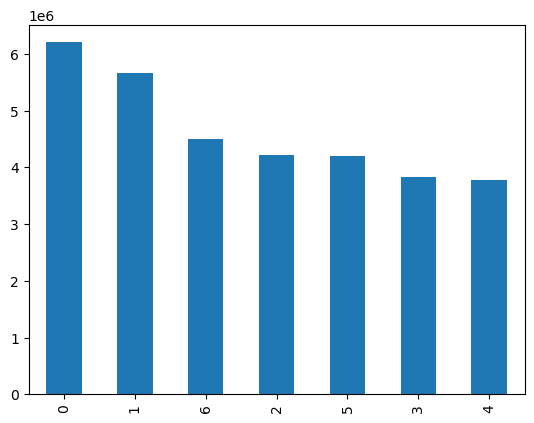

In [5]:
# Create bar chart 
df['orders_day_of_week'].value_counts().plot.bar()

The "sort_index()" function will sort the bars in chart according to their index order (rather than largest to sallest)

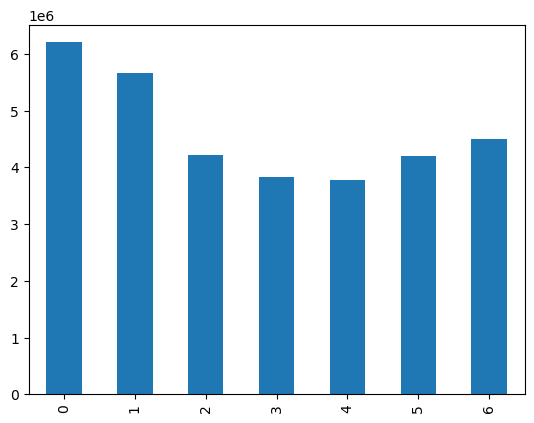

In [6]:
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# This same trick can be used when printig frequencies, as wel:
df['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [8]:
# Now frequency with 'sort_index()' function
df['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

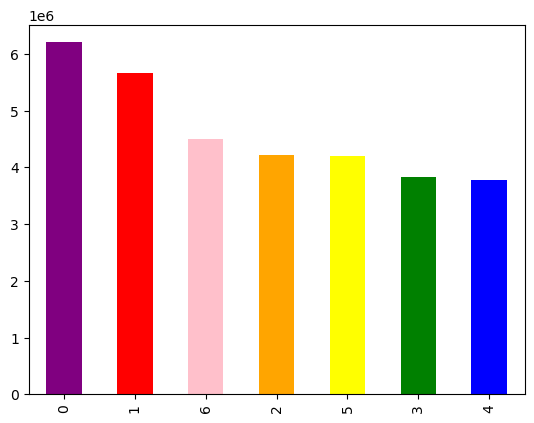

In [9]:
# To make bars more distinct, we can change their color simply addin a color argument in plot.bar() function 
bar = df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

## Exporting Charts

The bar chart has been saved within the 'bar' object, and it will be ab access any time by calling (bar.figure). To export it outside of Jupyter in the form of an image file. This can be done via the 'figure.savefig()' function:

In [10]:
# Eporting bar chart as 'bar_orders_dow.png'
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

## Histrograms

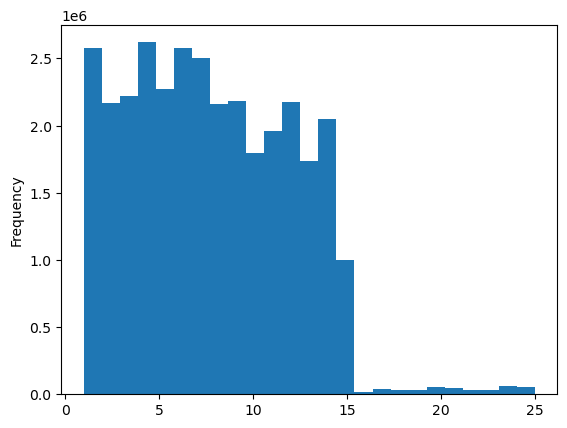

In [12]:
# Creating histrogram of 'prices' column.
hist = df['prices'].plot.hist(bins = 25)

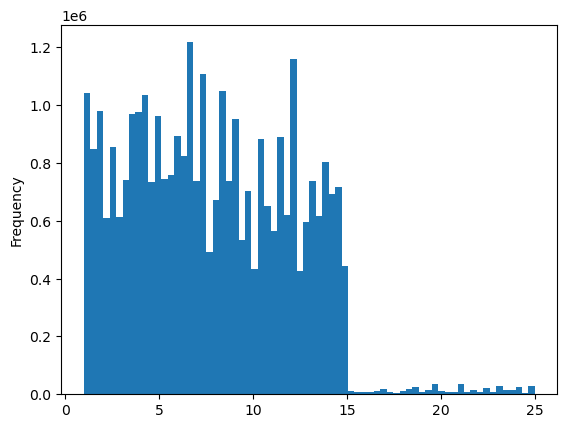

In [13]:
#To increase the level of granularity in the histogram, increase the number of bins to, 70.
# This will result in a histogram with more, thinner columns:
hist_2 = df['prices'].plot.hist(bins = 70)

In [14]:
# Exporting histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

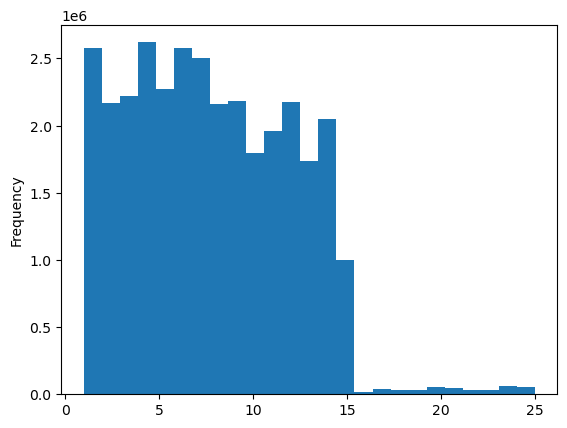

In [15]:
# calling histrogram
hist.figure

##  Scatterplots

<Axes: xlabel='prices', ylabel='prices'>

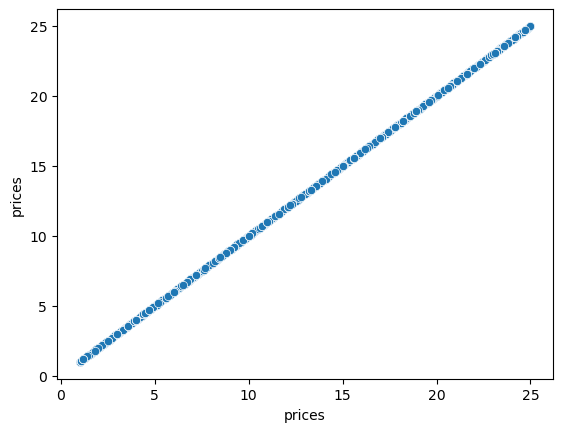

In [16]:
# Scatterplots are created by way of the scatterplot() function,
# which is included in the seaborn library (imported into your notebook as sns).
sns.scatterplot(x = 'prices', y = 'prices',data = df)

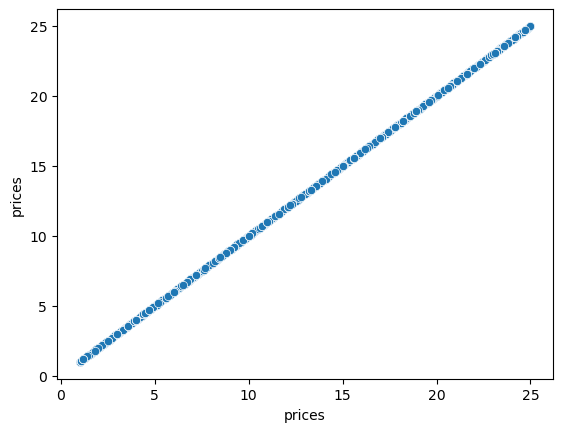

In [42]:
scotterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df)

## Creating Line Charts

Line charts are traditionally used to visualize the development of a characteristic over time. Since we don’t have dates that could indicate a timeline in Instacart data,we won’t be able to test this out on project just yet. however, to test out a different type of line chart, such as the development of the “prices” column across the days of the week. To achieve this, we'd plot the “orders_day_of_week” column on the x-axis and the “prices” column on the y-axis.
There is one major caveat: this line chart will require a great deal of computing power due to the number of unique values in the “prices” column. which will get to memory error etc.
to avoid this we can use the subsetting method. for example consider only plotting the top or bottom 2,000,000 rows of dataframe:
But does this work? The answer is, well, no. That’s because this subset wouldn’t be representative of the entire population. How, then, do you tackle a problem like this? The answer is simple—sampling!

## Sampling Data
It needs to be a random assortment taken from all throughout the dataframe. Only then can be sure it accurately represents the dataframe as a whole.
A sample, representtative of a population. we can split dataframe into two samples for instance 70/30 split. the 30 percent sample would statistically resemble the 70 percent sample but contain less rows.

In [18]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [19]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [20]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [21]:
# creating a list holding True/False values to test np.random.rand() <= 0.7
dev = np.random.rand(len(df)) <= 0.7

In [22]:
# store 70% of the sample in the dataframe big
big = df[dev]

In [23]:
# store 30% of the sample in the dataframe small
small = df[~dev]

In [25]:
len(df)

32404859

In [26]:
len(big) + len(small)

32404859

In [27]:
# create new dataframe call it df_2 and include only necessary columns
df_2 = small[['orders_day_of_week', 'prices']]

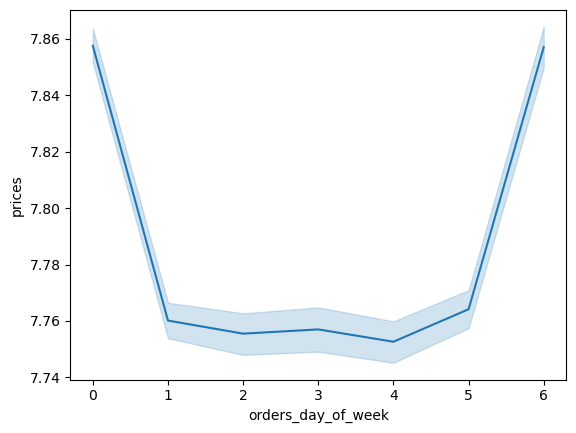

In [28]:
# Creating line chart.
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [29]:
# Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_orders_dow.png'))

## Step 3. Histrogram of the "order_hour_of_day" column.

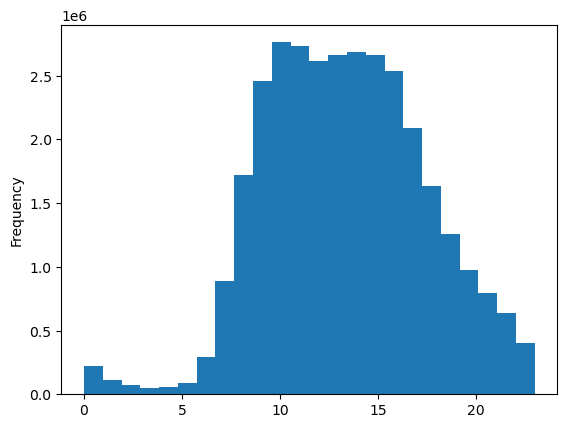

In [30]:
hist_order_hour = df['order_hour_of_day'].plot.hist(bins = 24)

The histogram illustrating 24 hours of recorded orders exhibits a clear daily pattern. Starting at 6 AM, the number of orders begins to rise steadily, with a gradual increase up until 10 AM. From 10 AM to 5 PM, the histogram reaches its peak, reflecting the busiest hours of order placements. After 5 PM, there is a gradual decline, and from 6 PM onwards, the number of orders starts to decrease until it reaches its lowest point around 3 AM, signifying the overnight lull in order activity. This histogram visually captures the fluctuating demand for orders throughout the day, with a prominent peak during regular business hours.

## Step 4. Bar Chart of the "loyalty_flag" column.

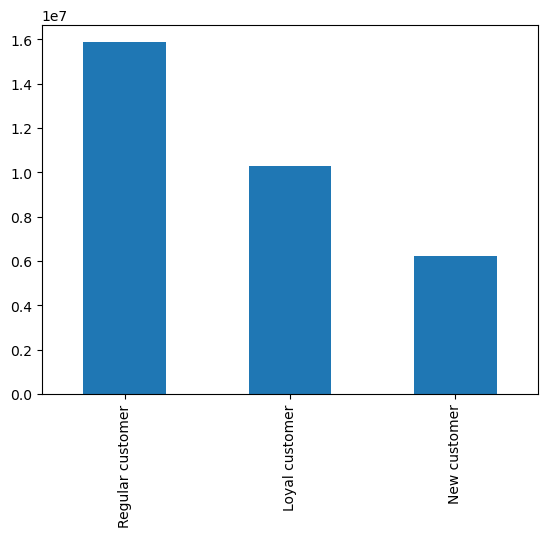

In [31]:
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar()

## Step 5. Line Chart of Hourly Expenditure.

In [36]:
# Line chart with df_2 small sample
df_3 = small [['order_hour_of_day', 'prices']]

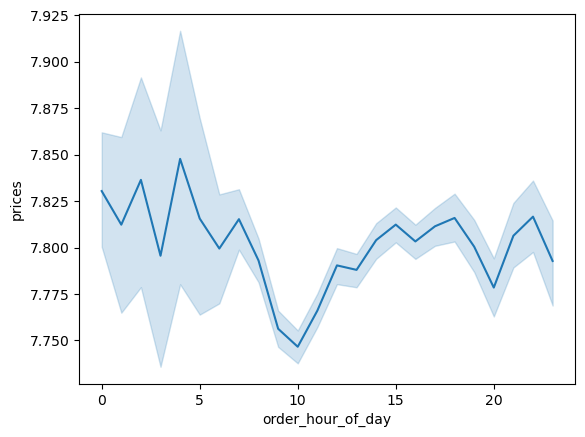

In [37]:
# Line chart of hourly expenditure on small sample data.
line_hour_expend = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

## Step 6. Line Chart: Connections b/w Age and Number of Dependents.

In [38]:
# checking the connection between age and number of depandents.
df_line_age = small[['dependants', 'age']]

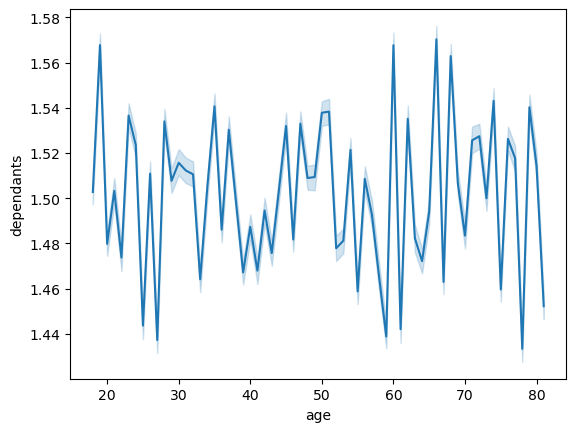

In [40]:
line_conn = sns.lineplot(data = df_line_age, x = 'age', y = 'dependants')

In the line chart depicting 'number of dependants and 'age' there is no direct connection or relationship between the two variables.

## Step 7. Scatterplot: Connection between Age and Spending power (income).

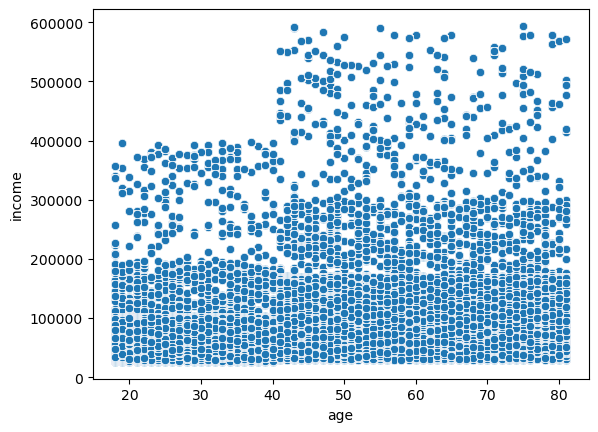

In [41]:
Scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df)

The scatterplot reveals the relationship between age and income, with age plotted on the x-axis and income on the y-axis. Across most age groups, from 20 to 80 years old, there is a consistent pattern where the majority of individuals have a yearly income of around 200,000. However, as age advances beyond 40 years, there is a noticeable trend where some individuals experience an increase in income, reaching up to 300,000. Furthermore, a few data points, primarily among individuals aged 45 and above, show income levels exceeding 300,000 but still remaining below 600,000, suggesting that there is some variation in income for this older age group.

## Step 8 Exporting Visualization.

In [44]:
scotterplot_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Scatterplot_prices.png'))

In [45]:
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_hour.png'))

In [46]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

In [48]:
line_hour_expend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_exp.png'))

In [49]:
line_conn.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dep.png'))

In [50]:
Scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))